Dataset: https://archive.ics.uci.edu/dataset/124/cmu+face+images

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image

In [2]:
path = "faces"
files = glob.glob(path + "/**/*.pgm", recursive=True) # get a list of paths to all the pgm image files from the dataset

In [3]:
data = []
for file_path in files:
    file_name_split = file_path.split("\\")[2].split("_")
    if len(file_name_split) == 4: # only use the full resolution version of each image
        data.append([
            file_name_split[0],
            file_name_split[1],
            file_name_split[2], 
            file_name_split[3][:-4], # [:-4] removes the .pgm at the end of the string
            " ".join(map(str, list(Image.open(file_path).getdata())))
        ])

df = pd.DataFrame(data, columns=["person", "direction", "emotion", "eyes", "pixels"])

In [4]:
df.head()

,person,direction,emotion,eyes,pixels
0,an2i,left,angry,open,34 3 2 0 3 29 96 105 92 75 75 77 80 83 82 82 9...
1,an2i,left,angry,sunglasses,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2,an2i,left,happy,open,34 3 0 0 3 29 98 108 95 75 77 78 83 85 85 83 9...
3,an2i,left,happy,sunglasses,36 3 2 2 5 32 102 112 97 78 80 81 86 86 86 86 ...
4,an2i,left,neutral,open,49 110 118 108 103 100 98 100 101 103 108 116 ...


In [5]:
# Open/view (an) image
num = 50
print(files[num].split("\\")[2].split("_")[2]) # emotion of the image being viewed
im = Image.open(files[num])
im.show() # opens the image outside of the notebook

angry


In [6]:
# maps the scale (full, half, or quarter resolution) to the size of the image
# 1,2, or 4 is specified in the file name
scale_dict = {1:(128, 120), 2:(64, 60), 4:(32, 30)}

In [7]:
# Handle duplicates (if any)
df.drop_duplicates(inplace=True)

In [8]:
# Check if there are any images labelled with more than 1 emotion
df[df.duplicated(subset=["pixels"])]

,person,direction,emotion,eyes,pixels


In [9]:
# Check if there are any nulls/NaN values
df[df.isna().any(axis=1)]

,person,direction,emotion,eyes,pixels


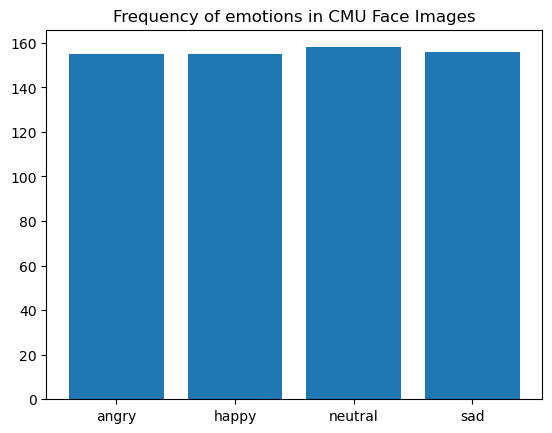

In [10]:
# get overall frequency of different emotions in CMU Face Images
emotions = df["emotion"].unique()
emotion_freq = dict()

for emotion in emotions:
    emotion_freq[emotion] = df["emotion"].value_counts()[emotion]

fig, ax = plt.subplots()
ax.bar(emotion_freq.keys(), emotion_freq.values())
ax.set_title("Frequency of emotions in CMU Face Images")

plt.show()

Emotion categories: 
- Angry: 155 images
- Happy: 155 images
- Neutral: 158 images
- Sad: 156 images

Total images: 624

16 images were excluded from the original 640 images due to problems with the camera setup (labelled with .bad suffix)

No duplicates were present in the dataset, and no images were assigned more than 1 emotion

In [11]:
# Display an image

labels = df.loc[:, 'emotion'] 
pixel_list = df.loc[:, 'pixels']

images = np.array([np.fromstring(pixels, dtype=int, sep=" ") for pixels in pixel_list])

'happy'

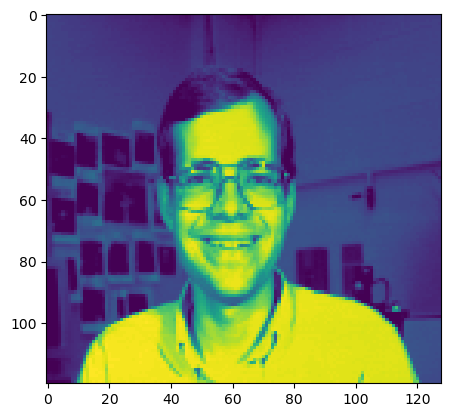

In [12]:
# reshape the image to display
img_num = 50
image = images[img_num].reshape(120, 128, 1).astype('float32')


# display the image
plt.imshow(image)
df.iloc[img_num]["emotion"]

In [14]:
# Write the df to a CSV
df.to_csv("CMU Face Images.csv", index=False)